# 1. Variable Scopes

The execution of a function introduces a new symbol table used for the local variables of the function. **More precisely, all variable assignments in a function store the value in the local symbol table; whereas variavle references first look in the local symbol table, then in the local symbol tables of enclosing functions, then in the global symbol table, and finally in the table of built-in names.** Thus, global variables and variables of enclosing functions cannot be directly assigned a value within a function (unless, for global variable, named in a **global** statement, or, for variables of enclosing functions, named in a **nonlocal** statement), although they may be referenced.

# 2. Arguments

First let's see some knowledge about dynamic typing. The following screen shots are from Learning Python, 5th Edition. 
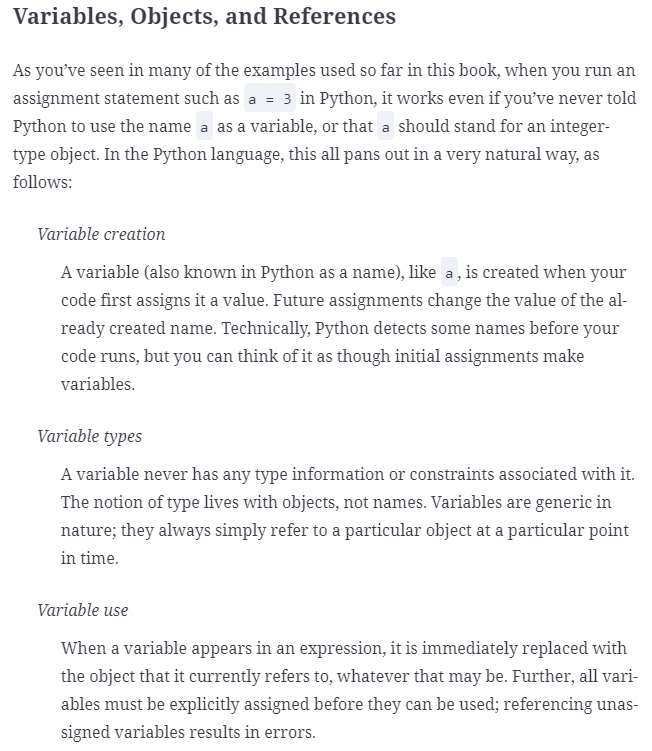
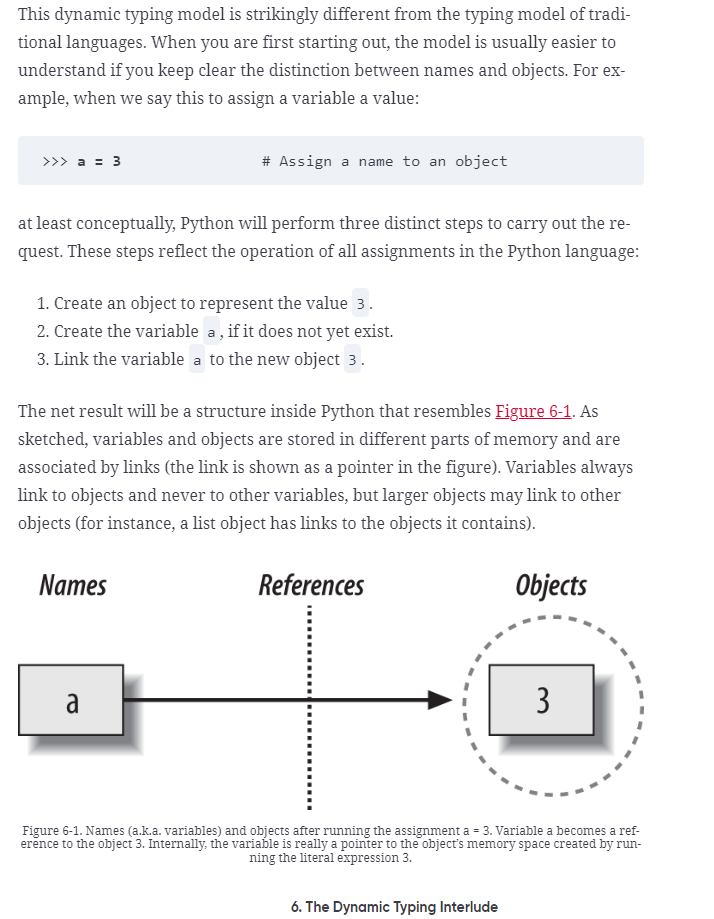

The actual parameters(arguments) to a function call are introduced in the local symbol table of the called function when it is called; thus, arguments are passed using ***call by value* (where the *value* is always an object *reference*, not the value of the object reference, not the value of the object)**. When a function calls another function, or calls itsself, a new local symbol table is created for that call.
- **Arguments are passed by automatically assigning objects to local variable names.** Function arguments are just another instance of Python assignment at work. Objects passed as arguments are never automatically copied.
- **Assigning to argument names inside a function does not affect the caller.** Argument names in the function header become new, local names when the function runs in the scope of the function. There is no aliasing between function argument names and variable names in the scope of the caller.
- **Changing a mutable object argument in a function may impact the caller.** On the other hand, as arguments are simply assigned to passed-in objects, functions can change passed-in mutable objects in place, and the results may affect the caller. Mutable arguments can be input and output for functions.

## 2. 1 Default Argument Values
The default values are evaluated at the point of function definition in the *defining* scope. The default value is evaluated only once. This makes a difference when the default is a mutable object.

In [1]:
i = 5
def f(arg=i):
    print(arg)
i = 6
f()

5


## 2.2 Positional / Keyword Arguments


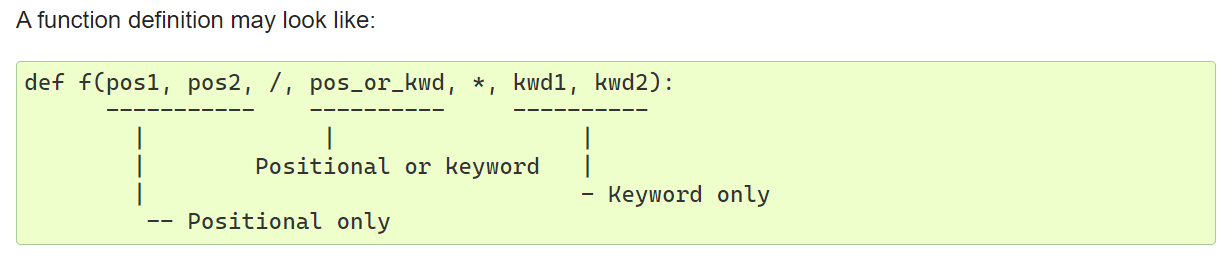

where / and \* are optional. 
- If *positional-only*, the parameters' order matters, and the parameters cannot be passed by keyword. If there is no / in the function definition, there are no positional-only parameters.
- If / and \* are not present in the function definition, arguments may be passed to a function by position or by keyword. Keyword arguments must follow positional arguments and their order is not important. This also includes non-optional arguments. 
- To mark parameters as *keyword-only*, indicating the parameters must be passed by keyword argument, place an * just before the first *keyword-only* parameter.

In [2]:
def standard_arg(arg):
    print(arg)
    
def pos_only_arg(arg, /):
    print(arg)
    
def kwd_only_arg(*, arg):
    print(arg)
    
def combined(pos_only, /, standard, *,kwd_only):
    print(pos_only, standard, kwd_only)

In [3]:
standard_arg(2)

2


In [4]:
standard_arg(arg=2)

2


In [5]:
pos_only_arg(2)

2


In [6]:
pos_only_arg(arg=2)

TypeError: pos_only_arg() got some positional-only arguments passed as keyword arguments: 'arg'

In [ ]:
kwd_only_arg(2)

In [ ]:
kwd_only_arg(arg=2)

In [ ]:
combined(2, 3, kwd_only=4)

In [ ]:
combined(2, standard=3, kwd_only=4)

## 2.3 Arbitrary Argument Lists
- __\*args__ receives a tuple containing the positional arguments beyond the formal parameter list.
- __\*\*kwargs__ receives a dictionary containing all keyword arguments except for those corresponding to a formal parameter.
  
__\*args__ must occur before __\*\*kwargs__. Any formal parameters which occur after the __\*args__ parameter are 'keyword-only' arguments.



In [ ]:
def concat(*args, sep='/'):
    return sep.join(args)

print(concat('red', 'blue', 'yellow'))
print(concat('red', 'blue', 'yellow', sep='|'))

Use \*-operaterto unpack the arguments out of a list or tuple. Use \*\*-operator to unpack the arguments out of a dictionary.

In [ ]:
concat(*['abc', 'def', 'ghi'])

In [ ]:
def print_info(id, **kwds):
    print(id)
    for k,v in kwds.items():
        print(f'{k}={v}')
        
def print_info_improved(id, /, **kwds):
    print(id)
    for k, v in kwds.items():
        print(f'{k}={v}')

In [ ]:
print_info(3, **{'id':3, 'name':'A', 'age':3})

In [ ]:
print_info_improved(3, **{'id':3, 'name':'A', 'age':3})

# 3. Readable code

## 3.1 docstrings

In [ ]:
def my_function():
    """Do nothing, but document it.
    
    Different Intention

No, really, it doesn't do anything.
    """
    pass
print(my_function.__doc__)

## 3.2 Function annotations

In [ ]:
def f(ham: str, eggs: str = 'eggs') -> str:
    print("Annotations:", f.__annotations__)
    print("Arguments:", ham, eggs)
    return ham + ' and ' + eggs

f('spam')

## 3.3 Coding Style 

- Name your classes and functions consistently; the convention is to use UpperCamelCase for classes and lowercase_with_underscores for functions and methods. 
- Wrap lines so that they don’t exceed 79 characters.
- Use blank lines to separate functions and classes, and larger blocks of code inside functions.

